# Introduction to Deep Learning: Full Final Project Code

### | GROUP 4  
### | Kaderka Christine (2021318796) / Ko Kyounghyeon (2017313272)
### | Target paper : *StarGANv2 : Diverse Image Synthesis for Multiple Domains* ([LINK](https://openaccess.thecvf.com/content_CVPR_2020/papers/Choi_StarGAN_v2_Diverse_Image_Synthesis_for_Multiple_Domains_CVPR_2020_paper.pdf))




---



# Basic settings

This section shows the basic settings.  
- It contains access step to repository and datasets.   
- To fully run the model without any problems, we set the virtual environment with conda.  

All the source of below setting codes are from  [HERE](https://github.com/clovaai/stargan-v2)


## 1. Clone the github repository

In this section, gdrive is mounted and the repository from github is cloned into the specified folder in gdrive.

In [ ]:
# Mount drive
import os, sys
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Clone Repository
%cd /content/drive/Shareddrives/DL\ FInal\ Project/
!git clone https://github.com/clovaai/stargan-v2.git

## 2. Download the datasets and pre-trained model into drive



In this section, the working directory is reset and then the CelebA-HQ dataset and the AFHQ dataset are downloaded into the specified folder in gdrive.

In [ ]:
# Reset working directory
%cd /content/drive/Shareddrives/DL\ FInal\ Project/stargan-v2/

/content/drive/Shareddrives/DL FInal Project/stargan-v2


In [ ]:
# Download CelebA-HQ Dataset and model
!bash download.sh celeba-hq-dataset
!bash download.sh pretrained-network-celeba-hq

# wing is a file for data parallel
!bash download.sh wing

In [ ]:
# Download AFHQ Dataset and model
!bash download.sh afhq-dataset
!bash download.sh pretrained-network-afhq

## 3. Create a virtual environment

**Virtual environment** : An isolated python environment where a project's dependencies are installed in a different directory or require the old version libraries.

In this section, a virtual environment is generated.  
If the code is run without generating a virtual environment, it could cause an error, because the version of the libraries or other settings could be different.

In [ ]:
# Initialize the path of installed python
%env PYTHONPATH=

env: PYTHONPATH=


In [ ]:
# Install conda on google colab to use `!conda` command
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.5.4-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

PREFIX=/usr/local
installing: python-3.6.5-hc3d631a_2 ...
installing: ca-certificates-2018.03.07-0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-hdf63c60_3 ...
installing: libstdcxx-ng-7.2.0-hdf63c60_3 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: ncurses-6.1-hf484d3e_0 ...
installing: openssl-1.0.2o-h20670df_0 ...
installing: tk-8.6.7-hc745277_3 ...
installing: xz-5.2.4-h14c3975_4 ...
installing: yaml-0.1.7-had09818_2 ...
installing: zlib-1.2.11-ha838bed_2 ...
installing: libedit-3.1.20170329-h6b74fdf_2 ...
installing: readline-7.0-ha6073c6_4 ...
installing: sqlite-3.23.1-he433501_0 ...
installing: asn1crypto-0.24.0-py36_0 ...
installing: certifi-2018.4.16-py36_0 ...
installing: chardet-3.0.4-py36h0f667ec_1 ...
installing: idna-2.6-py36h82fb2a8_1 ...
installing: pycosat-0.6.3-py36h0a5515d_0 ...
installing: pycparser-2.18-py36hf9f622e_1 ...
installing: pysocks-1.6.8-py36_0 ...
installing: ruamel_yaml-0.15.37-py36h14c3975_2 ...
installing: six-1.11

--2021-11-30 06:33:44--  https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh [following]
--2021-11-30 06:33:44--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58468498 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.4-Linux-x86_64.sh.9’

     0K .......... .......... .......... .......... ..........  0% 14.4M 4s
    50K .......... .......... .......... .......... ..........  

In [ ]:
# Install python (version 3.6.7) with conda 
%%bash
conda install --channel defaults conda python=3.6.7 --yes
conda update --channel defaults --all --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs: 
    - conda
    - python=3.6.7


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    wheel-0.37.0               |     pyhd3eb1b0_1          31 KB
    urllib3-1.26.7             |     pyhd3eb1b0_0         104 KB
    ncurses-6.3                |       h7f8727e_2         1.0 MB
    zlib-1.2.11                |       h7b6447c_3         120 KB
    _libgcc_mutex-0.1          |             main           3 KB
    ruamel_yaml-0.15.100       |   py36h27cfd23_0         268 KB
    openssl-1.1.1l             |       h7f8727e_0         3.8 MB
    six-1.16.0                 |     pyhd3eb1b0_0          18 KB
    readline-7.0               |       h7b6447c_5         392 KB
    pip-21.2.2                 |   py36h06a4308_0         2.1 MB
    yaml-0.2.5                 |       h7b6447c_0 

wheel-0.37.0         |   31 KB | ########## | 100% 
urllib3-1.26.7       |  104 KB | ########## | 100% 
ncurses-6.3          |  1.0 MB | ########## | 100% 
zlib-1.2.11          |  120 KB | ########## | 100% 
_libgcc_mutex-0.1    |    3 KB | ########## | 100% 
ruamel_yaml-0.15.100 |  268 KB | ########## | 100% 
openssl-1.1.1l       |  3.8 MB | ########## | 100% 
six-1.16.0           |   18 KB | ########## | 100% 
readline-7.0         |  392 KB | ########## | 100% 
pip-21.2.2           |  2.1 MB | ########## | 100% 
yaml-0.2.5           |   87 KB | ########## | 100% 
libstdcxx-ng-9.1.0   |  4.0 MB | ########## | 100% 
ca-certificates-2021 |  121 KB | ########## | 100% 
tqdm-4.62.3          |   79 KB | ########## | 100% 
libffi-3.2.1         |   52 KB | ########## | 100% 
libedit-3.1.20210910 |  191 KB | ########## | 100% 
setuptools-58.0.4    |  979 KB | ########## | 100% 
libgcc-ng-9.1.0      |  8.1 MB | ########## | 100% 
tk-8.6.11            |  3.2 MB | ########## | 100% 
cryptography

In [ ]:
# Generate virtual environment
!conda create -n stargan-v2 python=3.6.7 -y
!conda activate stargan-v2

Solving environment: - failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: \ | / done

## Package Plan ##

  environment location: /usr/local/envs/stargan-v2

  added / updated specs:
    - python=3.6.7


The following NEW packages will be INSTALLED:

  _libgcc_mutex      pkgs/main/linux-64::_libgcc_mutex-0.1-main
  _openmp_mutex      pkgs/main/linux-64::_openmp_mutex-4.5-1_gnu
  ca-certificates    pkgs/main/linux-64::ca-certificates-2021.10.26-h06a4308_2
  certifi            pkgs/main/linux-64::certifi-2021.5.30-py36h06a4308_0
  libedit            pkgs/main/linux-64::libedit-3.1.20210910-h7f8727e_0
  libffi             pkgs/main/linux-64::libffi-3.2.1-hf484d3e_1007
  libgcc-ng          pkgs/main/linux-64::libgcc-ng-9.3.0-h5101ec6_17
  libgomp            pkgs/main/linux-64::libgomp-9.3.0-h5101ec6_17
  libstdcxx-ng       pkgs/main/linux-64::libstdcxx-ng-9.3.0-hd4cf53a_17
  ncurses            pkgs/main/linux-64::ncurses-6.3-

## 4. Install requirements

In this section, the libraries of the specific python version are installed.

In [ ]:
# Install some libraries of specific version
!conda install -y pytorch=1.4.0 torchvision=0.5.0 cudatoolkit=10.0 -c pytorch
!conda install -y x264=='1!152.20180717' ffmpeg=4.0.2 -c conda-forge
!pip install opencv-python==4.1.2.30 ffmpeg-python==0.2.0 scikit-image==0.16.2
!pip install pillow==7.0.0 scipy==1.2.1 tqdm==4.43.0 munch==2.5.0

Solving environment: \ | / - \ | / - \ failed with initial frozen solve. Retrying with flexible solve.
Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cudatoolkit=10.0
    - pytorch=1.4.0
    - torchvision=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |              mkl           6 KB
    cudatoolkit-10.0.130       |                0       261.2 MB
    freetype-2.11.0            |       h70c0345_0         618 KB
    intel-openmp-2021.4.0      |    h06a4308_3561         4.2 MB
    jpeg-9d                    |       h7f8727e_0         

     |████████████████████████████████| 2.1 MB 5.2 MB/s 
     |████████████████████████████████| 24.8 MB 1.4 MB/s 
     |████████████████████████████████| 59 kB 8.4 MB/s 
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.62.3
    Uninstalling tqdm-4.62.3:
      Successfully uninstalled tqdm-4.62.3
  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.4
    Uninstalling scipy-1.5.4:
      Successfully uninstalled scipy-1.5.4
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.13.0 requires pillow>=8.3.2, but you have pillow 7.0.0 which is incompatible.


---

# Train

## 0. Basics

This section covers a few explanation needed to understand the training.  
The code below is used for the training.  
With this, we trained the model easily from scratch. 

```
# celeba-hq
python main.py --mode train --num_domains 2 --w_hpf 1 \
               --lambda_reg 1 --lambda_sty 1 --lambda_ds 1 --lambda_cyc 1 \
               --train_img_dir data/celeba_hq/train \
               --val_img_dir data/celeba_hq/val

# afhq
python main.py --mode train --num_domains 3 --w_hpf 0 \
               --lambda_reg 1 --lambda_sty 1 --lambda_ds 2 --lambda_cyc 1 \
               --train_img_dir data/afhq/train \
               --val_img_dir data/afhq/val
```





-------------------------------------------
 **List of parameters we can change**  [source here](https://github.com/clovaai/stargan-v2/blob/master/main.py#L86-L179)  

For example,  
- img_size (resizing the image size, default : 256)
- num_domains (number of domains)
- latent_dim (dimension of latent tensor)
- style_dim (dimension of style code output from mapping network and style encoder)
- ds_iter (iterations of diversity loss)
- total_iters (total iterations)
- batch_size (batch size per iteration)  
- etc.  

We can change the main parameters using below code form:

```
--parameter_name value
# Ex) 
--batch_size 10 --ds_iter 10 \
--hidden_dim 256 
```

Tweaks: We changed some parameters to reduce the running time (so we did not use the default values).   
  


<**What we changed**>
- img_size 256 -> 64
- batch_size 8 -> 1
- val_batch_size 32 -> 1
- num_outputs_per_domain 10 -> 3
- eval_every 50000 -> 100001 (Since evaluation during training 
takes too long to execute it, we didn't evaluation during training)

  
  Other parameters are default.


In [ ]:
# Working directory setting
%cd /content/drive/Shareddrives/DL\ FInal\ Project/stargan-v2/

/content/drive/Shareddrives/DL FInal Project/stargan-v2


**We trained two StarGAN v2 models with two datasets respectively.**

We trained the models by dividing the iterations.  
The argument `resume_iter` indicates the start point of the iteration where we want to continue training from.

🛑 Caution : It will take 10 hours for each datasets to train with colab pro.

## 1. Train with CelebA-HQ dataset

This section covers the training with the CelebA-HQ dataset for a total of 100,000 iterations. 

- Iteration : 0 ~ 10,000 (3 hours, with free version)

In [ ]:
# celeba-hq
# 1000~10000 done!
!python main.py --mode train --num_domains 2 --w_hpf 1 \
               --lambda_reg 1 --lambda_sty 1 --lambda_ds 1 --lambda_cyc 1 \
               \
               --img_size 64 \
               --batch_size 1 --val_batch_size 1 \
               --num_outs_per_domain 3 \
               --total_iters 100000 --ds_iter 100000 \
               --print_every 100 --sample_every 5000 --save_every 10000 --eval_every 100001 \
               --train_img_dir data/celeba_hq/train \
               --val_img_dir data/celeba_hq/val \
               --sample_dir expr/samples/celeba_hq \
               --checkpoint_dir expr/checkpoints/celeba_hq \

- Iteration : 10,000 ~ 15,000 (3 hours with free version)

In [ ]:
# celeba-hq
!python main.py --mode train --num_domains 2 --w_hpf 1 \
               --lambda_reg 1 --lambda_sty 1 --lambda_ds 1 --lambda_cyc 1 \
               \
               --img_size 64 \
               --batch_size 1 --val_batch_size 1 \
               --num_outs_per_domain 3 \
               --total_iters 100000 --ds_iter 100000 --resume_iter 10000 \
               --print_every 100 --sample_every 5000 --save_every 5000 --eval_every 100001 \
               --train_img_dir data/celeba_hq/train \
               --val_img_dir data/celeba_hq/val \
               --sample_dir expr/samples/celeba_hq \
               --checkpoint_dir expr/checkpoints/celeba_hq \

Namespace(batch_size=1, beta1=0.0, beta2=0.99, checkpoint_dir='expr/checkpoints/celeba_hq', ds_iter=100000, eval_dir='expr/eval', eval_every=100001, f_lr=1e-06, hidden_dim=512, img_size=64, inp_dir='assets/representative/custom/female', lambda_cyc=1.0, lambda_ds=1.0, lambda_reg=1.0, lambda_sty=1.0, latent_dim=16, lm_path='expr/checkpoints/celeba_lm_mean.npz', lr=0.0001, mode='train', num_domains=2, num_outs_per_domain=3, num_workers=4, out_dir='assets/representative/celeba_hq/src/female', print_every=100, randcrop_prob=0.5, ref_dir='assets/representative/celeba_hq/ref', result_dir='expr/results', resume_iter=10000, sample_dir='expr/samples/celeba_hq', sample_every=5000, save_every=5000, seed=777, src_dir='assets/representative/celeba_hq/src', style_dim=64, total_iters=100000, train_img_dir='data/celeba_hq/train', val_batch_size=1, val_img_dir='data/celeba_hq/val', w_hpf=1.0, weight_decay=0.0001, wing_path='expr/checkpoints/wing.ckpt')
Number of parameters of generator: 42209283
Number 

- Iteration : 15,000~100,000 (done) (8 hours 40 mins with pro version) 

In [ ]:
# celeba-hq
# 0~1000 done!
# 1000~10000 done!
# 10000~15000 done!
# 15000~ on going...
!python main.py --mode train --num_domains 2 --w_hpf 1 \
               --lambda_reg 1 --lambda_sty 1 --lambda_ds 1 --lambda_cyc 1 \
               \
               --img_size 64 \
               --batch_size 1 --val_batch_size 1 \
               --num_outs_per_domain 3 \
               --total_iters 100000 --ds_iter 100000 --resume_iter 15000 \
               --print_every 100 --sample_every 5000 --save_every 5000 --eval_every 100001 \
               --train_img_dir data/celeba_hq/train \
               --val_img_dir data/celeba_hq/val \
               --sample_dir expr/samples/celeba_hq \
               --checkpoint_dir expr/checkpoints/celeba_hq \

Namespace(batch_size=1, beta1=0.0, beta2=0.99, checkpoint_dir='expr/checkpoints/celeba_hq', ds_iter=100000, eval_dir='expr/eval', eval_every=100001, f_lr=1e-06, hidden_dim=512, img_size=64, inp_dir='assets/representative/custom/female', lambda_cyc=1.0, lambda_ds=1.0, lambda_reg=1.0, lambda_sty=1.0, latent_dim=16, lm_path='expr/checkpoints/celeba_lm_mean.npz', lr=0.0001, mode='train', num_domains=2, num_outs_per_domain=3, num_workers=4, out_dir='assets/representative/celeba_hq/src/female', print_every=100, randcrop_prob=0.5, ref_dir='assets/representative/celeba_hq/ref', result_dir='expr/results', resume_iter=15000, sample_dir='expr/samples/celeba_hq', sample_every=5000, save_every=5000, seed=777, src_dir='assets/representative/celeba_hq/src', style_dim=64, total_iters=100000, train_img_dir='data/celeba_hq/train', val_batch_size=1, val_img_dir='data/celeba_hq/val', w_hpf=1.0, weight_decay=0.0001, wing_path='expr/checkpoints/wing.ckpt')
Number of parameters of generator: 42209283
Number 

## 2. Train with AFHQ dataset

🛑 Caution : It will take 10 hours for each datasets to train with colab pro.

This section covers the training with the AFHQ dataset for a total of 100,000 iterations. 

- Iteration : 0 ~ 10,000 (3 hours with free version)

In [ ]:
# afhq
# 0~ progressing...
!python main.py --mode train --num_domains 3 --w_hpf 0 \
               --lambda_reg 1 --lambda_sty 1 --lambda_ds 2 --lambda_cyc 1 \
               \
               --img_size 64 \
               --batch_size 1 --val_batch_size 1 \
               --num_outs_per_domain 3 \
               --total_iters 100000 --ds_iter 100000 \
               --print_every 100 --sample_every 5000 --save_every 10000 --eval_every 100001 \
               --train_img_dir data/afhq/train \
               --val_img_dir data/afhq/val \
               --sample_dir expr/samples/afhq \
               --eval_dir expr/eval/afhq \
               --checkpoint_dir expr/checkpoints/afhq \

Namespace(batch_size=1, beta1=0.0, beta2=0.99, checkpoint_dir='expr/checkpoints', ds_iter=100000, eval_dir='expr/eval/afhq', eval_every=100001, f_lr=1e-06, hidden_dim=512, img_size=64, inp_dir='assets/representative/custom/female', lambda_cyc=1.0, lambda_ds=2.0, lambda_reg=1.0, lambda_sty=1.0, latent_dim=16, lm_path='expr/checkpoints/celeba_lm_mean.npz', lr=0.0001, mode='train', num_domains=3, num_outs_per_domain=3, num_workers=4, out_dir='assets/representative/celeba_hq/src/female', print_every=100, randcrop_prob=0.5, ref_dir='assets/representative/celeba_hq/ref', result_dir='expr/results', resume_iter=0, sample_dir='expr/samples/afhq', sample_every=5000, save_every=10000, seed=777, src_dir='assets/representative/celeba_hq/src', style_dim=64, total_iters=100000, train_img_dir='data/afhq/train', val_batch_size=1, val_img_dir='data/afhq/val', w_hpf=0.0, weight_decay=0.0001, wing_path='expr/checkpoints/wing.ckpt')
Number of parameters of generator: 32634883
Number of parameters of mappin

- iteration : 10,000 ~ 20,000 ((3 hours with free version)

In [ ]:
# afhq
# 0~10000 done!
# 10000~ progressing... 
!python main.py --mode train --num_domains 3 --w_hpf 0 \
               --lambda_reg 1 --lambda_sty 1 --lambda_ds 2 --lambda_cyc 1 \
               \
               --img_size 64 \
               --batch_size 1 --val_batch_size 1 \
               --num_outs_per_domain 3 \
               --total_iters 100000 --ds_iter 100000 --resume_iter 10000 \
               --print_every 100 --sample_every 5000 --save_every 5000 --eval_every 100001 \
               --train_img_dir data/afhq/train \
               --val_img_dir data/afhq/val \
               --sample_dir expr/samples/afhq \
               --eval_dir expr/eval/afhq \
               --checkpoint_dir expr/checkpoints/afhq \

Namespace(batch_size=1, beta1=0.0, beta2=0.99, checkpoint_dir='expr/checkpoints/afhq', ds_iter=100000, eval_dir='expr/eval/afhq', eval_every=100001, f_lr=1e-06, hidden_dim=512, img_size=64, inp_dir='assets/representative/custom/female', lambda_cyc=1.0, lambda_ds=2.0, lambda_reg=1.0, lambda_sty=1.0, latent_dim=16, lm_path='expr/checkpoints/celeba_lm_mean.npz', lr=0.0001, mode='train', num_domains=3, num_outs_per_domain=3, num_workers=4, out_dir='assets/representative/celeba_hq/src/female', print_every=100, randcrop_prob=0.5, ref_dir='assets/representative/celeba_hq/ref', result_dir='expr/results', resume_iter=10000, sample_dir='expr/samples/afhq', sample_every=5000, save_every=5000, seed=777, src_dir='assets/representative/celeba_hq/src', style_dim=64, total_iters=100000, train_img_dir='data/afhq/train', val_batch_size=1, val_img_dir='data/afhq/val', w_hpf=0.0, weight_decay=0.0001, wing_path='expr/checkpoints/wing.ckpt')
Number of parameters of generator: 32634883
Number of parameters o

- iteration : 20,000 ~ 100,000 (done, (8 hours with pro version))

In [ ]:
# afhq
# 0~10000 done!
# 10000~20000 done!
# 20000~ progressing...
!python main.py --mode train --num_domains 3 --w_hpf 0 \
               --lambda_reg 1 --lambda_sty 1 --lambda_ds 2 --lambda_cyc 1 \
               \
               --img_size 64 \
               --batch_size 1 --val_batch_size 1 \
               --num_outs_per_domain 3 \
               --total_iters 100000 --ds_iter 100000 --resume_iter 20000 \
               --print_every 100 --sample_every 5000 --save_every 5000 --eval_every 100001 \
               --train_img_dir data/afhq/train \
               --val_img_dir data/afhq/val \
               --sample_dir expr/samples/afhq \
               --eval_dir expr/eval/afhq \
               --checkpoint_dir expr/checkpoints/afhq \

Namespace(batch_size=1, beta1=0.0, beta2=0.99, checkpoint_dir='expr/checkpoints/afhq', ds_iter=100000, eval_dir='expr/eval/afhq', eval_every=100001, f_lr=1e-06, hidden_dim=512, img_size=64, inp_dir='assets/representative/custom/female', lambda_cyc=1.0, lambda_ds=2.0, lambda_reg=1.0, lambda_sty=1.0, latent_dim=16, lm_path='expr/checkpoints/celeba_lm_mean.npz', lr=0.0001, mode='train', num_domains=3, num_outs_per_domain=3, num_workers=4, out_dir='assets/representative/celeba_hq/src/female', print_every=100, randcrop_prob=0.5, ref_dir='assets/representative/celeba_hq/ref', result_dir='expr/results', resume_iter=20000, sample_dir='expr/samples/afhq', sample_every=5000, save_every=5000, seed=777, src_dir='assets/representative/celeba_hq/src', style_dim=64, total_iters=100000, train_img_dir='data/afhq/train', val_batch_size=1, val_img_dir='data/afhq/val', w_hpf=0.0, weight_decay=0.0001, wing_path='expr/checkpoints/wing.ckpt')
Number of parameters of generator: 32634883
Number of parameters o

# Evaluation


## 0. Basics

This section covers the basics for the evaluation of both datasets. 

The authors provided this code (Similar to the code from the train phase).

```
# celeba-hq
python main.py --mode eval --num_domains 2 --w_hpf 1 \
               --resume_iter 100000 \
               --train_img_dir data/celeba_hq/train \
               --val_img_dir data/celeba_hq/val \
               --checkpoint_dir expr/checkpoints/celeba_hq \
               --eval_dir expr/eval/celeba_hq

# afhq
python main.py --mode eval --num_domains 3 --w_hpf 0 \
               --resume_iter 100000 \
               --train_img_dir data/afhq/train \
               --val_img_dir data/afhq/val \
               --checkpoint_dir expr/checkpoints/afhq \
               --eval_dir expr/eval/afhq

```



We modified above code with the same hyper-parameters as in our training.

In [ ]:
# Working directory setting
%cd /content/drive/Shareddrives/DL\ FInal\ Project/stargan-v2/

/content/drive/Shareddrives/DL FInal Project/stargan-v2


## 1. CelebA-HQ dataset

In this section, the the evaluation is run on the CelebA-HQ dataset.    
It takes about 4 hours 15 mins for evaluating with pro version.

In [ ]:
# Evaluating...
!python main.py --mode eval --num_domains 2 --w_hpf 1 \
               --lambda_reg 1 --lambda_sty 1 --lambda_ds 1 --lambda_cyc 1 \
               --img_size 64 --batch_size 1 --val_batch_size 1 --num_outs_per_domain 3 \
               --resume_iter 100000 \
               --train_img_dir data/celeba_hq/train \
               --val_img_dir data/celeba_hq/val \
               --eval_dir expr/eval/celeba_hq \
               --checkpoint_dir expr/checkpoints/celeba_hq \

Namespace(batch_size=1, beta1=0.0, beta2=0.99, checkpoint_dir='expr/checkpoints/celeba_hq', ds_iter=100000, eval_dir='expr/eval/celeba_hq', eval_every=50000, f_lr=1e-06, hidden_dim=512, img_size=64, inp_dir='assets/representative/custom/female', lambda_cyc=1.0, lambda_ds=1.0, lambda_reg=1.0, lambda_sty=1.0, latent_dim=16, lm_path='expr/checkpoints/celeba_lm_mean.npz', lr=0.0001, mode='eval', num_domains=2, num_outs_per_domain=3, num_workers=4, out_dir='assets/representative/celeba_hq/src/female', print_every=10, randcrop_prob=0.5, ref_dir='assets/representative/celeba_hq/ref', result_dir='expr/results', resume_iter=100000, sample_dir='expr/samples', sample_every=5000, save_every=10000, seed=777, src_dir='assets/representative/celeba_hq/src', style_dim=64, total_iters=100000, train_img_dir='data/celeba_hq/train', val_batch_size=1, val_img_dir='data/celeba_hq/val', w_hpf=1.0, weight_decay=0.0001, wing_path='expr/checkpoints/wing.ckpt')
Number of parameters of generator: 42209283
Number o

## 2. AFHQ dataset

In this section, the evaluation is run on the AFHQ dataset.   
It takes about 5 hours 20 mins for evaluating with pro version.

In [ ]:
# Evaluating...
!python main.py --mode eval --num_domains 3 --w_hpf 0 \
               --lambda_reg 1 --lambda_sty 1 --lambda_ds 2 --lambda_cyc 1 \
               \
               --resume_iter 100000 \
               --train_img_dir data/afhq/train \
               --val_img_dir data/afhq/val \
               --eval_dir expr/eval/afhq \
               --checkpoint_dir expr/checkpoints/afhq \

Namespace(batch_size=1, beta1=0.0, beta2=0.99, checkpoint_dir='expr/checkpoints/afhq', ds_iter=100000, eval_dir='expr/eval/afhq', eval_every=50000, f_lr=1e-06, hidden_dim=512, img_size=64, inp_dir='assets/representative/custom/female', lambda_cyc=1.0, lambda_ds=2.0, lambda_reg=1.0, lambda_sty=1.0, latent_dim=16, lm_path='expr/checkpoints/celeba_lm_mean.npz', lr=0.0001, mode='eval', num_domains=3, num_outs_per_domain=3, num_workers=4, out_dir='assets/representative/celeba_hq/src/female', print_every=10, randcrop_prob=0.5, ref_dir='assets/representative/celeba_hq/ref', result_dir='expr/results', resume_iter=100000, sample_dir='expr/samples', sample_every=5000, save_every=10000, seed=777, src_dir='assets/representative/celeba_hq/src', style_dim=64, total_iters=100000, train_img_dir='data/afhq/train', val_batch_size=1, val_img_dir='data/afhq/val', w_hpf=0.0, weight_decay=0.0001, wing_path='expr/checkpoints/wing.ckpt')
Number of parameters of generator: 32634883
Number of parameters of mapp

# Our evaluation result

In this section, we show the results of our model and compare them with the model the authors run.

In [ ]:
import json # import json module

In [ ]:
# Working directory setting
%cd /content/drive/Shareddrives/DL\ FInal\ Project/stargan-v2/

/content/drive/Shareddrives/DL FInal Project/stargan-v2


## 1. CelebA-HQ result

The following code cell provides the results of the evaluation metrics LPIPS and FID for both the reference-guided images and latent-guided images for the CelebA-HQ dataset.

In [ ]:
# Printing FID & LPIPS for reference- and latent-guided images
print("CelebA-HQ Dataset Evaluation -------------")

with open('expr/eval/celeba_hq/LPIPS_100000_reference.json') as json_file:
    json_data = json.load(json_file)
    print("LPIPS_reference_mean :", json_data["LPIPS_reference/mean"])

with open('expr/eval/celeba_hq/LPIPS_100000_latent.json') as json_file:
    json_data = json.load(json_file)
    print("LPIPS_latent_mean    :", json_data["LPIPS_latent/mean"])

with open('expr/eval/celeba_hq/FID_100000_reference.json') as json_file:
    json_data = json.load(json_file)
    print("FID_reference_mean   :", json_data["FID_reference/mean"])

with open('expr/eval/celeba_hq/FID_100000_latent.json') as json_file:
    json_data = json.load(json_file)
    print("FID_latent_mean      :", json_data["FID_latent/mean"])


CelebA-HQ Dataset Evaluation -------------
LPIPS_reference_mean : 0.10193965859804302
LPIPS_latent_mean    : 0.03286341517278925
FID_reference_mean   : 44.15972018063502
FID_latent_mean      : 31.14206868813932


**Comparison with the paper's result**

Note : **LPIPS** higher is better / **FID** lower is better

Paper LPIPS_reference_mean --- 0.388 vs. 0.1019 (Ours)   
Paper LPIPS_latent_mean --------- 0.452 vs. 0.0328 (Ours)     
Paper FID_reference_mean ------- 23.8  vs. 44.1597 (Ours)   
Paper FID_latent_mean ------------- 13.7  vs. 31.1420 (Ours) 

The paper has better values for FID and LPIPS. We think those differences are the result of changing the hyper-parameters (mainly in image size, batch size).

### Generated sample images 

The following two code cells show a sample of male to female and female to male respectively. 

- Source : Male 
- Target : Female

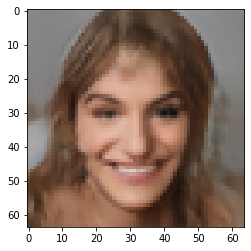

In [ ]:
# Display one of the generated images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('expr/eval/celeba_hq/male2female/0500_01.png')
imgplot = plt.imshow(img)
plt.show()

- Source : Female
- Target : Male

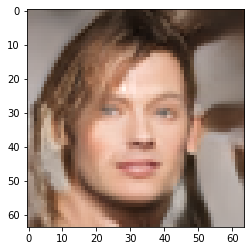

In [ ]:
img = mpimg.imread('expr/eval/celeba_hq/female2male/0500_01.png')
imgplot = plt.imshow(img)
plt.show()

## 2. AFHQ result

The following code cell provides the results of the evaluation metrics LPIPS and FID for both the reference-guided images and latent-guided images for the AFHQ dataset.

In [ ]:
print("AFHQ Dataset Evaluation --------------------")

with open('expr/eval/afhq/LPIPS_100000_reference.json') as json_file:
    json_data = json.load(json_file)
    print("LPIPS_reference_mean :", json_data["LPIPS_reference/mean"])

with open('expr/eval/afhq/LPIPS_100000_latent.json') as json_file:
    json_data = json.load(json_file)
    print("LPIPS_latent_mean    :", json_data["LPIPS_latent/mean"])

with open('expr/eval/afhq/FID_100000_reference.json') as json_file:
    json_data = json.load(json_file)
    print("FID_reference_mean   :", json_data["FID_reference/mean"])

with open('expr/eval/afhq/FID_100000_latent.json') as json_file:
    json_data = json.load(json_file)
    print("FID_latent_mean      :", json_data["FID_latent/mean"])

AFHQ Dataset Evaluation --------------------
LPIPS_reference_mean : 0.22191367447500432
LPIPS_latent_mean    : 0.21541090431312723
FID_reference_mean   : 59.981546763744774
FID_latent_mean      : 66.63883443081914


**Comparison with the paper's result**

Note : **LPIPS** higher is better / **FID** lower is better

Paper LPIPS_reference_mean --- 0.432 vs. 0.2219 (Ours)  
Paper LPIPS_latent_mean --------- 0.450 vs. 0.2154 (Ours)  
Paper FID_reference_mean ------- 19.8 vs. 59.9815 (Ours)  
Paper FID_latent_mean ------------- 16.2 vs. 66.6388 (Ours) 

Like the CelebA-HQ dataset, there are differences in the results between our results and the paper's results.

### Generated sample images 

The following two code cells show a sample of wildlife to cat and dog to cat respectively. 

- Source : Wildlife
- Target : Cat

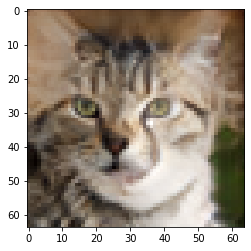

In [ ]:
# Display one of the generated images
img = mpimg.imread('expr/eval/afhq/wild2cat/0110_01.png')
imgplot = plt.imshow(img)
plt.show() # Close to cat but ears are blurred.

- Source : Dog 
- Target : Cat

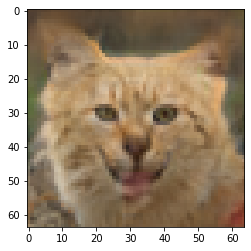

In [ ]:
img = mpimg.imread('expr/eval/afhq/dog2cat/0111_01.png')
imgplot = plt.imshow(img)
plt.show() # dog ? cat ? puma..? .......... 